## New IFP Code

To be completed.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

### Exercise 4

Adapt the endogenous grid method to solve the income fluctuation problem described in [this lecture](https://lectures.quantecon.org/py/ifp.html).  Using the default parameters from the `ConsumerProblem` class in that lecture, compute and plot the optimal policy.  Compare it with the policy produced by time iteration with an exogenous grid, as per the code for the Coleman operator in `ConsumerProblem`.  (See exercise 1 of the lecture.)



#### Solution

In [ ]:

from scipy.optimize import fminbound, brentq

class IFP:
    
    def __init__(self,
                    r=0.01
                    beta=0.96
                    Pi=((0.6, 0.4), (0.05, 0.95))
                    Pi = np.asarray(Pi)
                    z_vals=(0.5, 1.0)
                    b=0
                    grid_max=16,
                    grid_size=50,
                    u=np.log,
                    du=lambda x: 1/x
                    du_inv=x):
        
        self.r, self.beta, self.Pi, self.z_vals = r, beta, Pi, z_vals
        self.b, self.u, self.du, self.du_inv = b, u, du, du_inv
        
        self.R = 1 + r
        self.gamma = self.R * self.beta
        self.asset_grid = np.linspace(-b, grid_max, grid_size)

        # === linear interpolation to get consumption function === #
        def cf(self, a, c):
            """
            Returns an array containing the values c(a,z) for each z in z_vals.  
            For each such z, the value c(a, z)
            is constructed by univariate linear approximation over asset
            space, based on the values in the array c.
            """
            for i_z in range(z_size):
                vals[i_z] = np.interp(a, asset_grid, c[:, i_z])
            return vals

def coleman_operator_ifp(c, ifp):
    """
    The approximate Coleman operator.

    Parameters
    ----------
    c : array_like(float)
        A NumPy array of dim len(cp.asset_grid) times len(cp.z_vals)
    ifp : instance of IFP
        Stores model parameters
        
    Returns
    -------
    array_like(float)
        The updated policy, where updating is by the Coleman
        operator. function TV.

    """
    # === simplify names, set up arrays === #
    R, Pi, beta, du, b = ifp.R, ifp.Pi, ifp.beta, ifp.du, ifp.b
    asset_grid, z_vals = ifp.asset_grid, ipf.z_vals
    cf = lambda a: ifp.cf(a, c)
    z_size = len(z_vals)
    vals = np.empty(z_size)

    # === solve for root to get Kc === #
    Kc = np.empty(c.shape)
    for i_a, a in enumerate(asset_grid):
        for i_z, z in enumerate(z_vals):
            def h(t):
                expectation = np.dot(du(cf(R * a + z - t)), Pi[i_z, :])
                return du(t) - max(gamma * expectation, du(R * a + z + b))
            Kc[i_a, i_z] = brentq(h, 1e-8, R * a + z + b)

    return Kc

In [ ]:
def coleman_ifp_egm(c, ifp):
    """
    The approximate Coleman operator, using EGM.

    Parameters
    ----------
    cp : an instance of ConsumerProblem
        Contains parameters, primitives and grid information
        
    c : array_like(float)
        A NumPy array of dim len(cp.asset_grid) times len(cp.z_vals)
        
    Returns
    -------
    array_like(float)
        The updated policy.

    """
    # === simplify names, set up arrays === #
    R, Pi, beta, du, b = ifp.R, ifp.Pi, ifp.beta, ipf.du, ifp.b
    asset_grid, z_vals = ifp.asset_grid, ifp.z_vals
    z_size = len(z_vals)
    gamma = R * beta
    vals = np.empty(z_size)

    # === linear interpolation to get consumption function === #
    def cf(a):
        """
        The call cf(a) returns an array containing the values c(a,
        z) for each z in z_vals.  For each such z, the value c(a, z)
        is constructed by univariate linear approximation over asset
        space, based on the values in the array c
        """
        for i in range(z_size):
            vals[i] = np.interp(a, asset_grid, c[:, i])
        return vals

    # === solve for root to get Kc === #
    Kc = np.empty(c.shape)
    for i_z, z in enumerate(z_vals):
        
        for i_a, a in enumerate(asset_grid):
        
            def h(t):
                expectation = np.dot(du(cf(R * a + z - t)), Pi[i_z, :])
                return du(t) - max(gamma * expectation, du(R * a + z + b))
            Kc[i_a, i_z] = brentq(h, 1e-8, R * a + z + b)

    return Kc
    

In [4]:
ifp = IFP()
shape = len(asset_grid), len(z_vals)
V, c = np.empty(shape), np.empty(shape)

# === Populate V and c === #
for i_a, a in enumerate(asset_grid):
    for i_z, z in enumerate(z_vals):
        c_max = R * a + z + b
        c[i_a, i_z] = c_max
        V[i_a, i_z] = u(c_max) / (1 - beta)

In [2]:
from quantecon import compute_fixed_point

Starting value function iteration
Starting policy function iteration


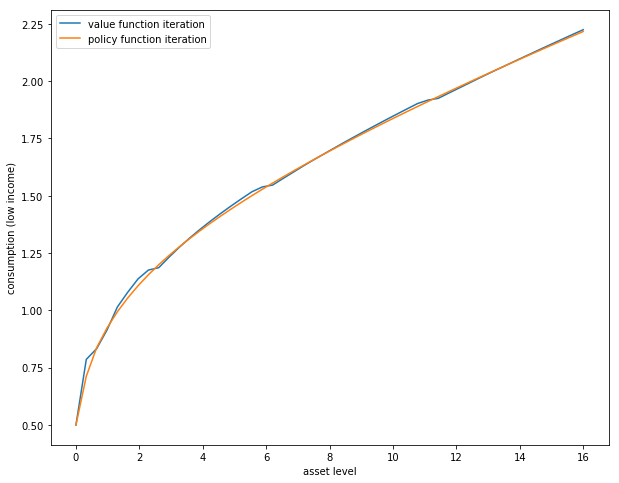

In [3]:
cp = ConsumerProblem()
K = 80

# Policy iteration
print("Starting policy function iteration")
V, c2 = cp.initialize()
for i in range(K):
    # print "Current iterate = " + str(i)
    c2 = cp.coleman_operator(c2)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cp.asset_grid, c1[:, 0], label='value function iteration')
ax.plot(cp.asset_grid, c2[:, 0], label='policy function iteration')
ax.set_xlabel('asset level')
ax.set_ylabel('consumption (low income)')
ax.legend(loc='upper left')
plt.show()
